<a href="https://colab.research.google.com/github/frogi16/MLP-learning-visualiser/blob/main/RedWineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying wines from public dataset

## Preparations

In [19]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import copy
import numpy as np
import pandas as pd
import math

**Data will be read from given link**

In [20]:
#columns:
#    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
#    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
#    "pH", "sulphates", "alcohol", "quality"

data = pd.read_csv (r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

y = pd.DataFrame(data, columns= ['quality']).values.ravel()
X = pd.DataFrame(data)
X = X.drop(columns='quality')

Prepare input

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(11, 50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=10,
                    learning_rate_init=.14, early_stopping=False,
                    n_iter_no_change = 5, warm_start = True)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.partial_fit(X_train, y_train, np.unique(y_train))

Iteration 1, loss = 1.34803647


In [23]:
#number of neurons on last layer
len(np.unique(y_train))

6

In [24]:
train_scores = []
test_scores = []
predictions = []
biases = []
coefs = []

Step by 1 iteration 40 times and save weights in betweens

In [25]:
for i in range(40):
  mlp.partial_fit(X_train, y_train)
  train_scores.append(mlp.score(X_train, y_train))
  test_scores.append(mlp.score(X_test, y_test))
  coefs.append(copy.deepcopy(mlp.coefs_))
  biases.append(copy.deepcopy(mlp.intercepts_))
  predictions.append(mlp.predict(X_test))
  #print("Training set score: %f" % train_scores[-1])
  #print("Test set score: %f" % test_scores[-1])



#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

#plt.plot(mlp.validation_scores_)

#for coeff_map in mlp.coefs_:
#  print("-------------------")
#  for coeff in coeff_map:
#    print("---" + str(coeff))

Iteration 2, loss = 1.13276260
Iteration 3, loss = 1.05426415
Iteration 4, loss = 1.00919669
Iteration 5, loss = 0.97766089
Iteration 6, loss = 0.95813043
Iteration 7, loss = 0.94436083
Iteration 8, loss = 0.93433251
Iteration 9, loss = 0.92580490
Iteration 10, loss = 0.91765275
Iteration 11, loss = 0.90903523
Iteration 12, loss = 0.90078431
Iteration 13, loss = 0.89258557
Iteration 14, loss = 0.88432377
Iteration 15, loss = 0.87536546
Iteration 16, loss = 0.86790763
Iteration 17, loss = 0.85968146
Iteration 18, loss = 0.85136054
Iteration 19, loss = 0.84350076
Iteration 20, loss = 0.83431299
Iteration 21, loss = 0.82525138
Iteration 22, loss = 0.81610485
Iteration 23, loss = 0.80783539
Iteration 24, loss = 0.79845530
Iteration 25, loss = 0.78865543
Iteration 26, loss = 0.77907687
Iteration 27, loss = 0.76856556
Iteration 28, loss = 0.75954493
Iteration 29, loss = 0.75107954
Iteration 30, loss = 0.74273012
Iteration 31, loss = 0.73547915
Iteration 32, loss = 0.72817187
Iteration 33, lo

# Visualisations

## Standard

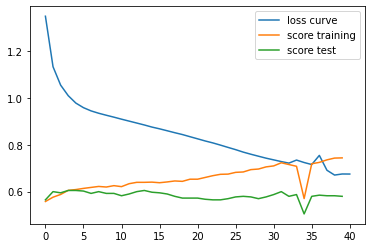

In [26]:
plt.plot(mlp.loss_curve_, label='loss curve')
plt.plot(train_scores, label='score training')
plt.plot(test_scores, label='score test')
plt.legend()

In [27]:
print("biases")
print("size:\t", len(biases[0]))
for i in range(len(coefs[0])):
  print("\tsize:\t", len(coefs[0][i]))
print()
print("coefs")
print("size:\t", len(coefs[0]))
for i in range(len(coefs[0])):
  print("\tsize:\t", len(coefs[0][i]), "x", len(coefs[0][i][0]))

biases
size:	 4
	size:	 11
	size:	 11
	size:	 50
	size:	 50

coefs
size:	 4
	size:	 11 x 11
	size:	 11 x 50
	size:	 50 x 50
	size:	 50 x 6


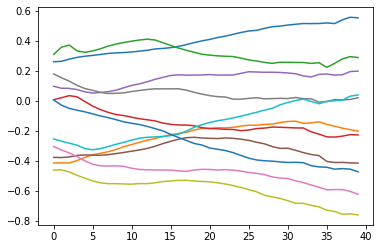

In [28]:
biases_0 = [biases[i][0] for i in range(len(biases))]
plt.plot(biases_0)

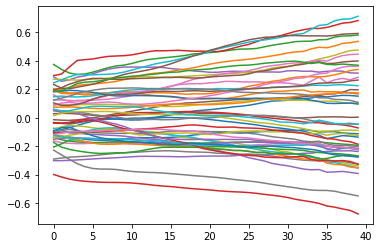

In [29]:
biases_1 = [biases[i][1] for i in range(len(biases))]
plt.plot(biases_1)

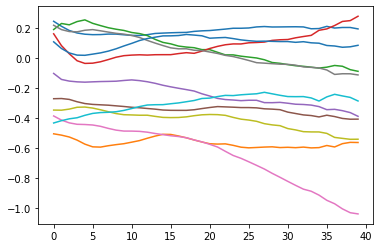

In [30]:
weights = [coefs[i][0][0] for i in range(len(coefs))]
plt.plot(weights)

## Custom

In [31]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import colors

In [32]:
def create_grid_for_visualisation(vmin = -1, vmax = 1):
  fig = plt.figure(frameon=False, dpi=150)
  grid = ImageGrid(fig, 111, nrows_ncols=(2, 1), axes_pad=0.3, cbar_mode="single", cbar_location="right")
  cbar = plt.cm.ScalarMappable(cmap='bwr', norm=colors.Normalize(vmin=vmin, vmax=vmax))
  fig.colorbar(cbar, cax=grid.cbar_axes[0], orientation="vertical")
  return fig, grid

def plot_weigths_and_biases(grid, iteration, n_layer):
  return [grid[0].imshow(coefs[iteration][n_layer], cmap='bwr', origin='lower'),
          grid[1].imshow([biases[iteration][n_layer]], cmap='bwr', origin='lower')]

def set_title_after_every_iteration(grid, n_layer, iteration):
  grid[0].set_title(f"Wagi połączeń, warstwa {n_layer}\n" + f"iteracja {iteration}")

def describe_axes_and_labels(grid, iteration, n_layer):
  set_title_after_every_iteration(grid, n_layer, iteration)
  grid[1].set_xlabel('Neuron wyjściowy')
  grid[0].set_ylabel('Neuron wejściowy')

  grid[1].set_title('Biasy', fontsize=10)
  grid[1].yaxis.set_visible(False) 

In [33]:
def plot_layer(iteration, n_layer):
  fig, grid = create_grid_for_visualisation()
  describe_axes_and_labels(grid, iteration, n_layer)
  plot_weigths_and_biases(grid, iteration, n_layer)
  fig.show()

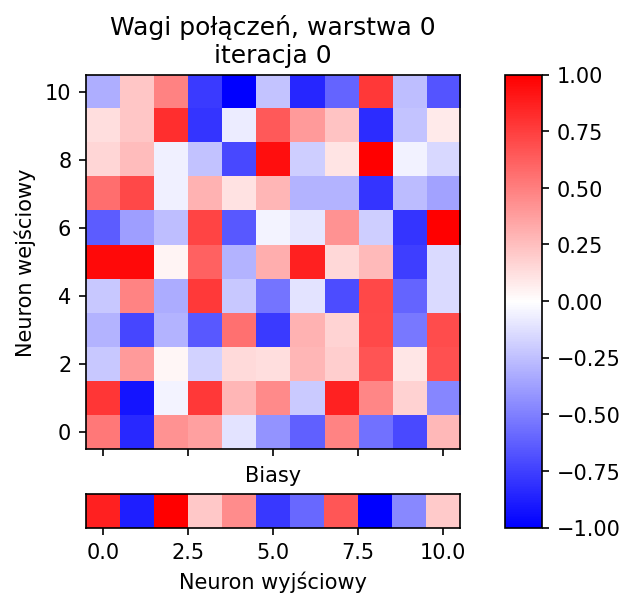

In [34]:
plot_layer(0, 0)

In [37]:
from matplotlib import rc
rc('animation', html='jshtml')

import math
import numpy as np
from matplotlib import animation, colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def animate_layer_no(n_layer):
    fig, grid = create_grid_for_visualisation()
    describe_axes_and_labels(grid, 0, n_layer)

    def animate(i):
        print('\r', 'Frame ', i, end='')
        set_title_after_every_iteration(grid, n_layer, i)
        return plot_weigths_and_biases(grid, i, n_layer)

    anim = animation.FuncAnimation(fig, animate, frames=len(coefs), interval=100, blit=True)
    return anim

 Frame  39

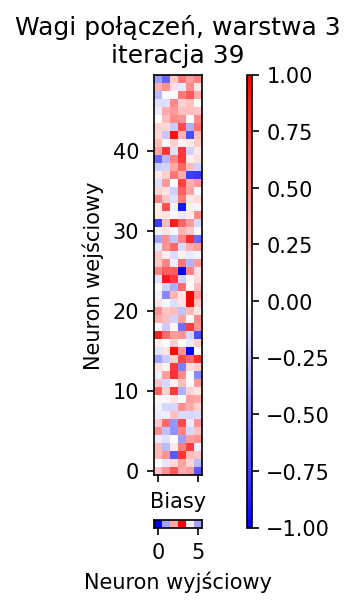

In [41]:
anim = animate_layer_no(3)
anim.save('layer3.gif', writer = "pillow", fps=5)
anim